In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

data = load_boston()
X = data.data
y = data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=17)

In [2]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

# Question 1

In [3]:
def tree_summary(dt):
    print("Score d'apprentissage:",dt.score(X_train,y_train))
    print("Score de test:",dt.score(X_test,y_test))
    print("Profondeur de l'arbre:",dt.tree_.max_depth)
    print("Nombre de noeuds:",dt.tree_.node_count)

In [4]:
tree_summary(dt)

Score d'apprentissage: 1.0
Score de test: 0.791457769006894
Profondeur de l'arbre: 17
Nombre de noeuds: 709


L'arbre est profond avec un grand nombre de noeuds.  Le
surapprentissage est important car le score d'apprentissage est
carrément égal à 1 tandis que le score de test est nettement
inférieur.

# Question 2

In [5]:
dt2 = DecisionTreeRegressor(random_state=0,max_depth=3).fit(X_train,y_train)
tree_summary(dt2)

Score d'apprentissage: 0.8160045697821083
Score de test: 0.7311557939115028
Profondeur de l'arbre: 3
Nombre de noeuds: 15


On obtient comme prévu un arbre de pronfondeur 3. Le nombre de noeuds est bien moindre que dans l'arbre précédent. Le score de test est légèrement moins bon, mais le sur-apprentissage est bien moins prononcé.

[Text(167.4, 190.26, 'X[12] <= 7.475\n379\n22.399'),
 Text(83.7, 135.9, 'X[5] <= 7.437\n102\n32.788'),
 Text(41.85, 81.53999999999999, 'X[7] <= 1.485\n81\n29.399'),
 Text(20.925, 27.180000000000007, '3\n50.0'),
 Text(62.775000000000006, 27.180000000000007, '78\n28.606'),
 Text(125.55000000000001, 81.53999999999999, 'X[10] <= 19.65\n21\n45.862'),
 Text(104.625, 27.180000000000007, '20\n47.06'),
 Text(146.475, 27.180000000000007, '1\n21.9'),
 Text(251.10000000000002, 135.9, 'X[12] <= 15.0\n277\n18.573'),
 Text(209.25, 81.53999999999999, 'X[7] <= 1.207\n152\n21.918'),
 Text(188.32500000000002, 27.180000000000007, '1\n50.0'),
 Text(230.175, 27.180000000000007, '151\n21.732'),
 Text(292.95, 81.53999999999999, 'X[0] <= 5.769\n125\n14.506'),
 Text(272.02500000000003, 27.180000000000007, '64\n16.859'),
 Text(313.875, 27.180000000000007, '61\n12.036')]

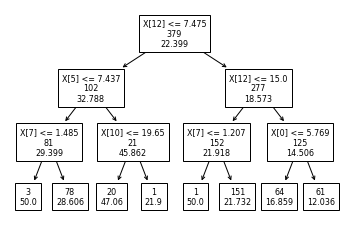

In [6]:
from sklearn.tree import plot_tree
plot_tree(dt2,fontsize=8, label=None, impurity=False)

# Question 3

Les variables explicatives intervenant dans l'arbre sont X_12, X_5, X_7, X_10 et X_0, qui correspondent respectivement à LSTAT, RM, DIS, PTRATIO et CRIM.

# Question 4

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[4,5,6,7,8]}
predictor= GridSearchCV(DecisionTreeRegressor(random_state=0),cv=10,param_grid=param_grid)
predictor.fit(X_train,y_train)
print('Paramètre sélectionné:',predictor.best_params_)
print('Score d\'apprentissage: ',predictor.score(X_train,y_train))
print('Score de test: ',predictor.score(X_test,y_test))

Paramètre sélectionné: {'max_depth': 6}
Score d'apprentissage:  0.9492494537851387
Score de test:  0.8564480113817428


# Question 5

In [8]:
def r2_score(y_true,y_predict):
    return 1-np.sum((y_true-y_predict)**2)/np.sum((y_true-np.mean(y_true))**2)

# Question 6

In [9]:
from sklearn.utils import resample

In [10]:
X_train_,y_train_ = resample(X_train,y_train)
dt_ = DecisionTreeRegressor(random_state=0).fit(X_train_,y_train_)
print('Score de test:',r2_score(y_test,dt_.predict(X_test)))

Score de test: 0.7515409154031799


# Question 7

In [11]:
dts_predictions = np.zeros((5,y_test.size))
for m in range(0,5):
    X_train_,y_train_ = resample(X_train,y_train)
    dts_predictions[m,:] = DecisionTreeRegressor(random_state=0).fit(X_train_,y_train_).predict(X_test)

# Question 8

In [12]:
dts_aggregated_predictions = np.mean(dts_predictions,axis=0)
print("Score R² du prédicteur agrégé:",r2_score(y_test,dts_aggregated_predictions))

Score R² du prédicteur agrégé: 0.8690810871731197


# Question 9

In [13]:
def tree_aggregation(n_trees):
    dts_predictions = np.zeros((n_trees,y_test.size))
    for m in range(0,n_trees):
        X_train_,y_train_ = resample(X_train,y_train)
        dts_predictions[m,:] = DecisionTreeRegressor(random_state=0).fit(X_train_,y_train_).predict(X_test)
    dts_aggregated_predictions = np.mean(dts_predictions,axis=0)
    print("Score de test:",r2_score(y_test,dts_aggregated_predictions))

In [14]:
tree_aggregation(1000)

Score de test: 0.9052044188593537


# Question 10

In [15]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor(n_estimators=1000).fit(X_train,y_train).score(X_test,y_test)

0.9047306178457997

Notre procédure et celle scikit-learn donnent des résultats très similaires.